# Post training Analysis

Our main Aim is here to find why our model is predicting False postivies (realiabe news to unrealibe news) and False negatives (unrealibe news to realiabe news) label

for answer the above question we are doing following things:

1.We are breaking our data into best_data and worst_data by probability values predicted by the model and doing a depth analysis on both of them.

2.we are checking the distribution of the featues which are False positive or False Negative by Positive labeled data (only fake news data) and Negative Labeled data(only non-fake news data) respectively to understand the behaviour of the model.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import re
from bs4 import BeautifulSoup
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense,Input,Activation
from tensorflow.keras.models import Model
import random as rn
import tensorflow as tf
import tensorflow.keras.backend as K
import datetime
from sklearn.preprocessing import OneHotEncoder
import tensorflow_hub as hub
import joblib
import pickle
from sklearn.metrics import f1_score,roc_auc_score,roc_auc_score,confusion_matrix,log_loss,roc_curve,auc
# from lime import lime_text

In [3]:
import os
os.getcwd()
os.chdir('/content/drive/MyDrive/data/CS_2')
os.getcwd()

'/content/drive/MyDrive/data/CS_2'

In [4]:
# loading preprocessed data.
embedding_matrix=joblib.load('Embedding_matrix.pkl')
token_glove=joblib.load('Token_glove.pkl')
train_pre=pd.read_csv('train_pre.csv')

###fuctions

In [7]:
## fuction for ploting word cloud
## refrence:- greeksforgeeks
def word_cloud(column):
  # Reads 'Youtube04-Eminem.csv' file
  df =column

  comment_words = ''
  stopwords = set(STOPWORDS)

  # iterate through the csv file
  for val in df:
    
    # typecaste each val to string
    val = str(val)

    # split the value
    tokens = val.split()
    
    # Converts each token into lowercase
    for i in range(len(tokens)):
      tokens[i] = tokens[i].lower()
    
    comment_words += " ".join(tokens)+" "

  wordcloud = WordCloud(width = 800, height = 800,
          background_color ='white',
          stopwords = stopwords,
          min_font_size = 10).generate(comment_words)

  # plot the WordCloud image					
  plt.figure(figsize = (8, 8), facecolor = None)
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout(pad = 0)

  plt.show()


def predict_test_thre(proba, threshould):
    predictions = []
    for i in proba:
        if i>=0.5:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

def Test_prediction(model,x_tr):
  y_predict_tr=model.predict(x_tr)
  pred=predict_test_thre(y_predict_tr, threshould=0.5)
  return pred

In [12]:
#loading the model
lstm_cnn_model=tf.keras.models.load_model("best_model/Lstm_cnn_model.h5")

In [13]:
train_pre['merged']=train_pre['merged'].astype('str')
#tokenization and padding
encode_text_train=token_glove.texts_to_sequences(train_pre['merged'])
max_length=int(1014)  # 95 precentile of the words in X_train.
encode_text_train_paded=tf.keras.preprocessing.sequence.pad_sequences(encode_text_train, maxlen=max_length, padding='post')

In [15]:
# getting prediction
y_pre_prob=lstm_cnn_model.predict(encode_text_train_paded)

In [ ]:
# saving the output in the dataframe
train_pre['label_pro']=y_pre_prob

### Here we are breaking data by probability values for best_data and worst data

In [5]:
# printing length of train data
print(len(train_pre))

18240


In [14]:
# breaking dataframe in best_data, wrost_data nd medium_data
best_data=train_pre[((train_pre['label']==1) & (train_pre['label_pro']>=0.8)) | ((train_pre['label']==0) & (train_pre['label_pro']<=0.2))]

In [ ]:
best

In [ ]:
len(best_data)

18000

In [ ]:
worst_data=train_pre[((train_pre['label']==1) & (train_pre['label_pro']<=0.2)) | ((train_pre['label']==0) & (train_pre['label_pro']>=0.8))]

In [ ]:
len(worst_data)

182

### Observation
##### We have total count of data is **18240** ,in Best_data total number of rows are **18000** and for worst data the count of rows are **182** so we have only **60** rows left for medium data.

## Analysis of best and worst data

### ploting word cloud  for the best data

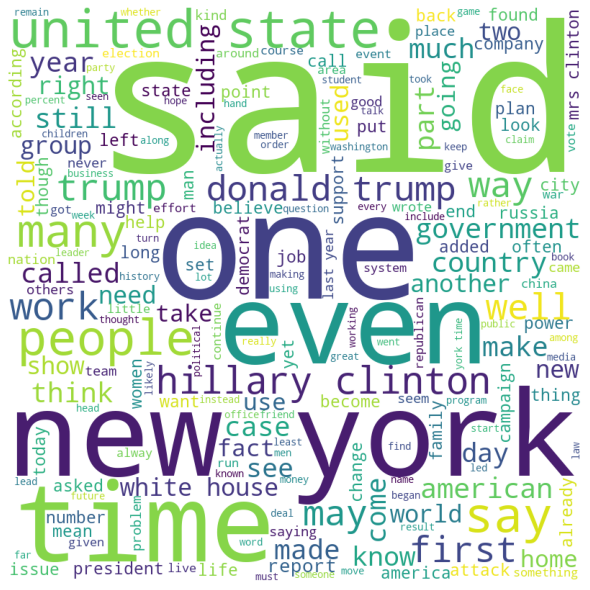

In [ ]:
word_cloud(best_data['merged'])

### Observations
1. we can see that *said* and *new york* used more in best_data set.
2. *Said*, *new yourk*, and the above words are helped to in our classification task more.

## ploing the word cloud for worst data.

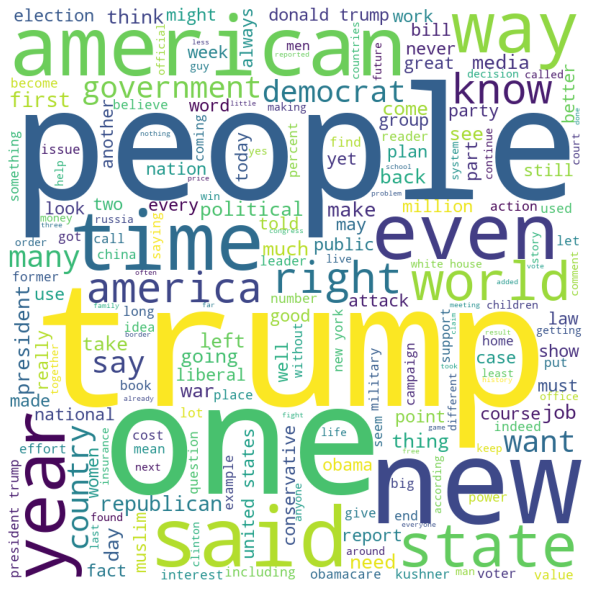

In [ ]:
word_cloud(worst_data['merged'])

### Obsevations
1. *trump*, *people* , *one* and are more frequent in worst_data.
2. *year*, *one*, *trump* and above do worst effect on our model.

## Checking distribution of length on merged data for best and worst dataset.

In [ ]:
best_data['len_merged']=best_data['merged'].apply(lambda x: len(str(x)))
worst_data['len_merged']=worst_data['merged'].apply(lambda x: len(str(x)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


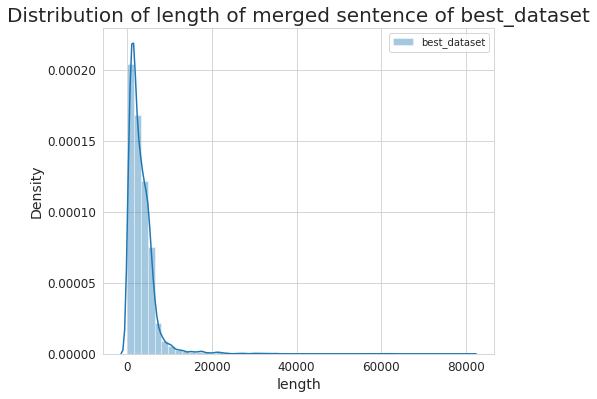

In [ ]:
plt.figure(figsize=(7,6)) # hight and width of plot 
sns.set_style('whitegrid') # backgroud of plot 
sns.distplot(best_data['len_merged'],label='best_dataset')
plt.xticks(size = 12) # size of x axis indicators(yes/no)
plt.yticks(size = 12)
plt.legend()
plt.title('Distribution of length of merged sentence of best_dataset', fontsize=20)
plt.xlabel('length', size = 14)
plt.ylabel('Density', size = 14)
plt.show()

### Observations
1. best_dataset has maximunm length of sentence belongs to 0 to 20k.
2. best_dataset has very few sentences length that belongs to more then 20k.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


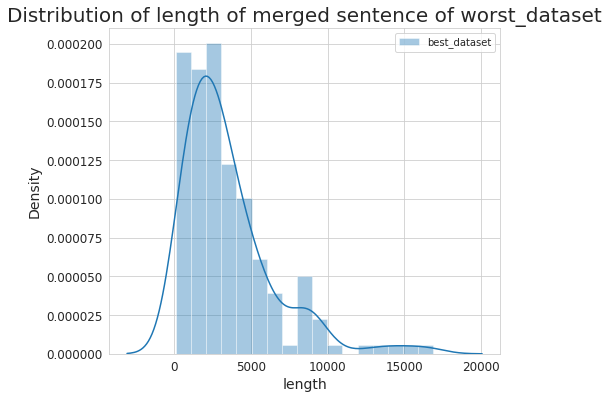

In [ ]:
plt.figure(figsize=(7,6)) # hight and width of plot 
sns.set_style('whitegrid') # backgroud of plot 
sns.distplot(worst_data['len_merged'],label='best_dataset')
plt.xticks(size = 12) # size of x axis indicators(yes/no)
plt.yticks(size = 12)
plt.legend()
plt.title('Distribution of length of merged sentence of worst_dataset', fontsize=20)
plt.xlabel('length', size = 14)
plt.ylabel('Density', size = 14)
plt.show()

### Observations 
1. In worst_dataset length of maximum sentances have 5k words.
2. Very few sentences have lengths geater then 10k words.

# Analysis on false predicted data

Negative data where labe1 == 0

Postive data where label==1

False negative data actual=1 but predicted=0

False positive data actual=0 but predicted=1

In [ ]:
lstm_cnn_predictions=Test_prediction(lstm_cnn_model,encode_text_train_paded)
train_pre['label_pred']=lstm_cnn_predictions

In [ ]:
train_pre['len_merged']=train_pre['merged'].apply(lambda x: len(str(x)))

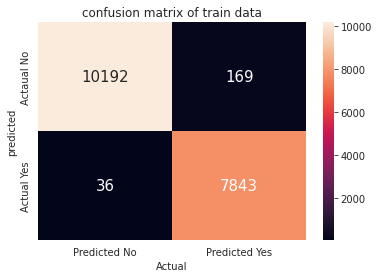

logloss   = 0.3881899283400444
F1        = 0.987099616134919
Accuracy  = 0.9887609649122807


In [ ]:
import sklearn
conf_mat = pd.DataFrame(confusion_matrix(train_pre['label'], train_pre['label_pred']))

sns.heatmap(conf_mat, annot = True, fmt= 'd',annot_kws={"size": 15}, xticklabels= ['Predicted No', 'Predicted Yes'], yticklabels= ['Actaual No','Actual Yes'])
plt.title('confusion matrix of train data')
plt.xlabel('Actual')
plt.ylabel('predicted')
plt.show()

print('logloss   =',sklearn.metrics.log_loss(train_pre['label'], train_pre['label_pred']))

print('F1        =',sklearn.metrics.f1_score(train_pre['label'], train_pre['label_pred']))

print('Accuracy  =',sklearn.metrics.accuracy_score(train_pre['label'], train_pre['label_pred']))

In [ ]:
# sepating diffrent dataframe based on its predicted and actual label
False_negative_df=train_pre.loc[(train_pre['label'] ==1) & (train_pre['label_pred']==0)]
false_positive_df=train_pre.loc[(train_pre['label'] ==0) & (train_pre['label_pred']==1)]
positive_df=train_pre.loc[(train_pre['label'] ==1)]
negative_df=train_pre.loc[(train_pre['label'] ==0)]

### Word cloud of False negative data

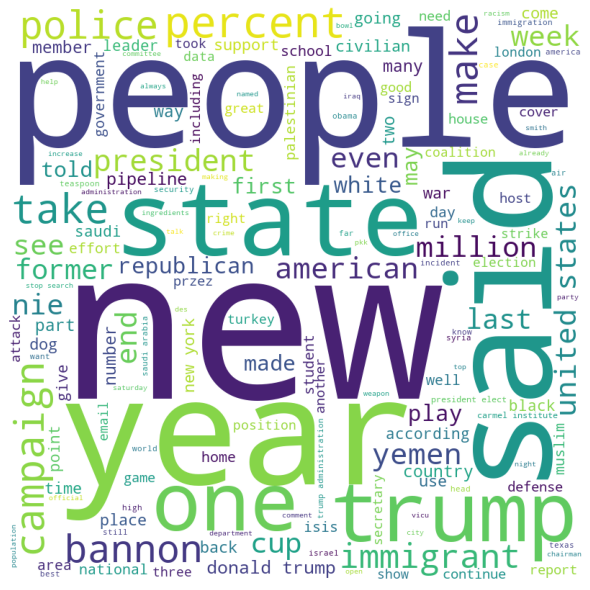

In [ ]:
word_cloud(False_negative_df['merged'])

### Observations
1. **people**,**police**,**immigrant**, and above other words are cause confusion while predicting.


### Word cloud of title of False negative data.

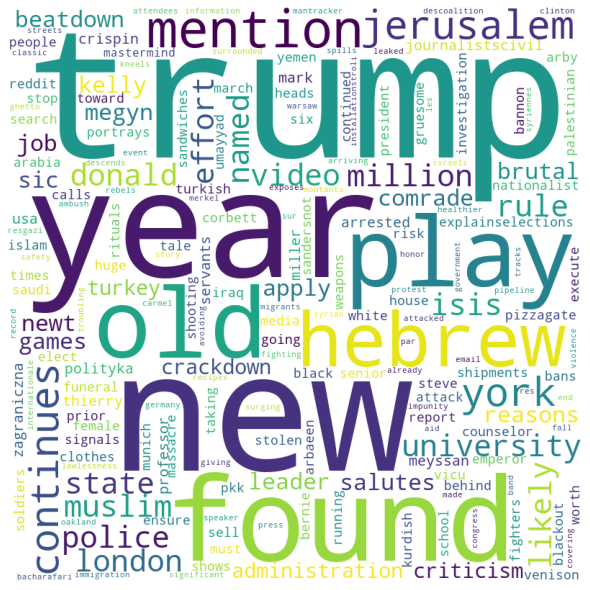

In [ ]:
word_cloud(False_negative_df['pre_title'])

### Observations
1. Most of the words commonly found in false negative title are **trump**,**found** etc.

### Word cloud of author of False negative data.

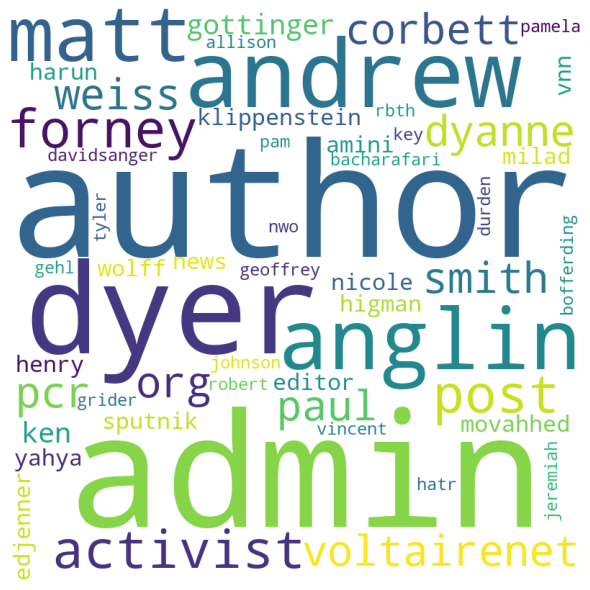

In [ ]:
word_cloud(False_negative_df['pre_author'])

### Obseravtions
1. Most common author which predicted false are **admin**, **dyer**,**author** and etc.

## Distribution of length of false negative and false positive.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


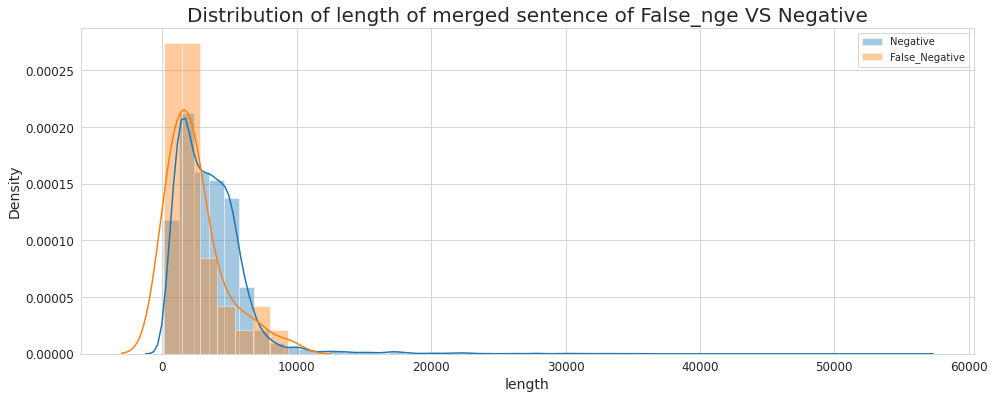

In [ ]:
plt.figure(figsize=(16,6)) # hight and width of plot 
sns.set_style('whitegrid') # backgroud of plot 
sns.distplot(negative_df['len_merged'],label='Negative')
sns.distplot(False_negative_df['len_merged'],label='False_Negative')
plt.xticks(size = 12) # size of x axis indicators(yes/no)
plt.yticks(size = 12)
plt.legend()
plt.title('Distribution of length of merged sentence of False_nge VS Negative', fontsize=20)
plt.xlabel('length', size = 14)
plt.ylabel('Density', size = 14)
plt.show()

### Observations

1. we can see that distribution of false negative and negative is almost same.
2. Negative data has very few of the word have length more then 20k to 80k.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


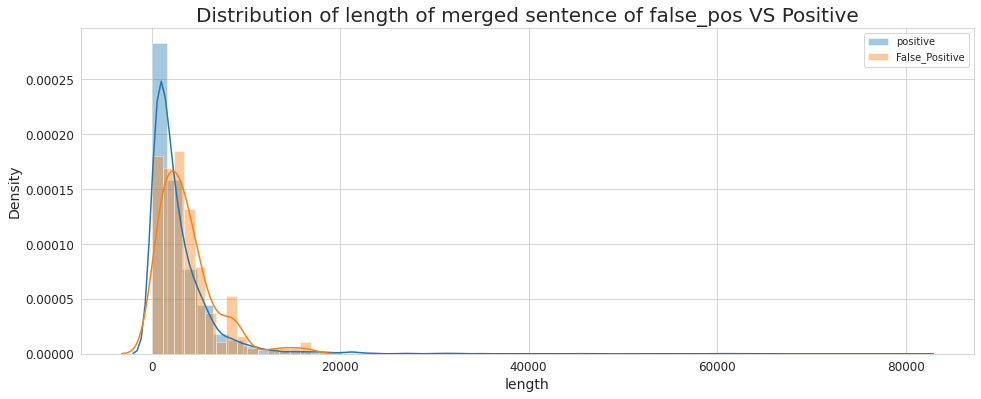

In [ ]:
plt.figure(figsize=(16,6)) # hight and width of plot 
sns.set_style('whitegrid') # backgroud of plot 
sns.distplot(positive_df['len_merged'],label='positive')
sns.distplot(false_positive_df['len_merged'],label='False_Positive')
plt.xticks(size = 12) # size of x axis indicators(yes/no)
plt.yticks(size = 12)
plt.legend()
plt.title('Distribution of length of merged sentence of false_pos VS Positive', fontsize=20)
plt.xlabel('length', size = 14)
plt.ylabel('Density', size = 14)
plt.show()

###Observations

1. we can see that distribution of false positive and positive is almost same
2. false positive has word ranges between 0 to 20k.
3. postive data has very few of the word have length more then 20k to 80k.